# 프로젝트: 다양한 OCR모델 비교하기
- 우리는 지금까지 **Google OCR API, keras-ocr, Tesseract** 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.


- 지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. 
- OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을 것도 같습니다. 
- 그런데 과연 어떤 것을 사용하는 것이 좋을까요?


- OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 
- 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 
  
  
- 그래서 오늘 다뤄본 **위 3가지를 검증해 보는 프로젝트**를 진행하겠습니다. 
  - 여러분은 **OCR 기능을 활용한 서비스를 빠르게 개발**해야 하는 임무를 맡은 엔지니어가 되어,
  - **어떤 모듈을 도입하면 좋을 지 기술 검증**을 하는 역할을 맡게 되었다고 가정합니다.

- 프로젝트를 시작하기 전에 주요 라이브러리 버전을 살펴보죠.

In [6]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## Step1. 검증용 데이터셋 준비
- OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 
- 여러분들은 위 3가지 기능들이 **이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증**하기 위한 이미지 데이터를 모아야 합니다. 
- 이미지가 많을수록 좋겠지만 **검증해야 할 항목별로 고루 갖춰지는 것**도 중요합니다.

- 가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 
- 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

### ※ 기술 검증용 데이터셋: 웹에서 다운로드 한 이미지
- **id_card_kor.png (자동차운전면허증): 사진, 도장, 영문, 한글 포함**
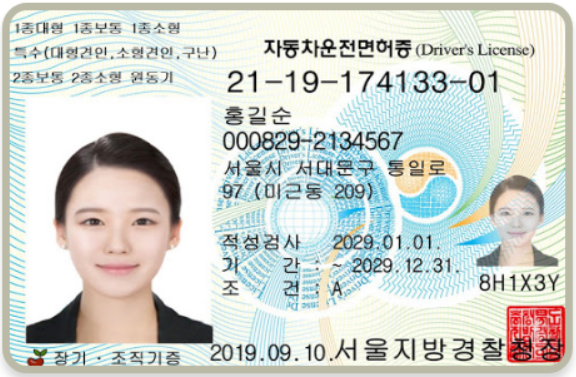
  <br>  <br> 
- **id_card_eng.png (외국인등록증): 사진, 라벨, 영문, 한글 포함**
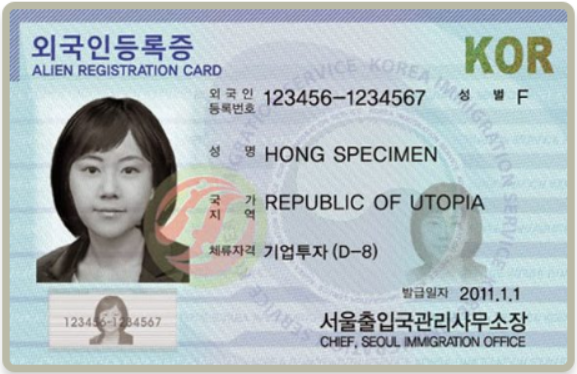
  <br>  <br> 
- **ko_handwriting.png (손글씨 파일)**
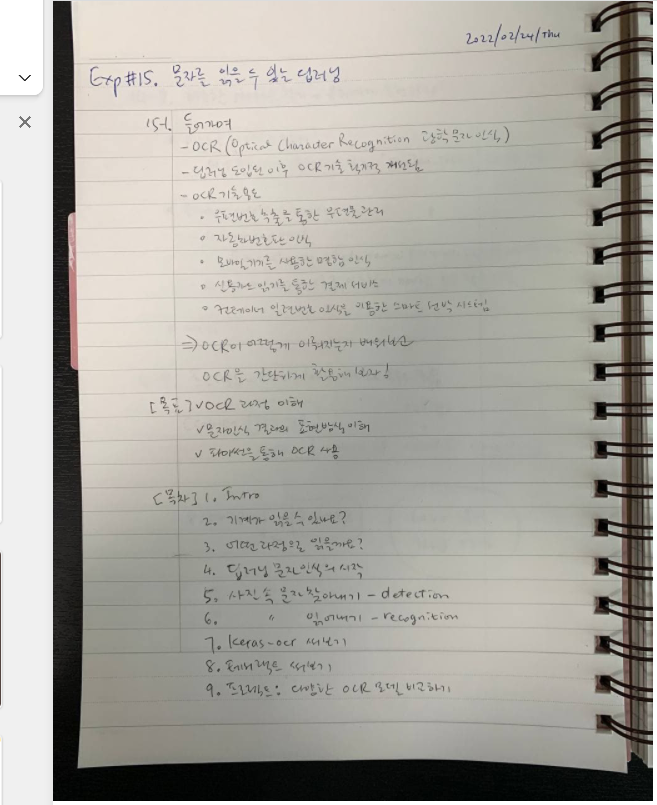

### ※ (가정) 임무: OCR 기능을 활용한 공문서 데이터 구축 서비스 개발
- [공공행정문서 OCR 소개](https://aihub.or.kr/aidata/30724)
- 공문서 데이터베이스 구축에 검토해야 할 주요 문서 유형 10가지

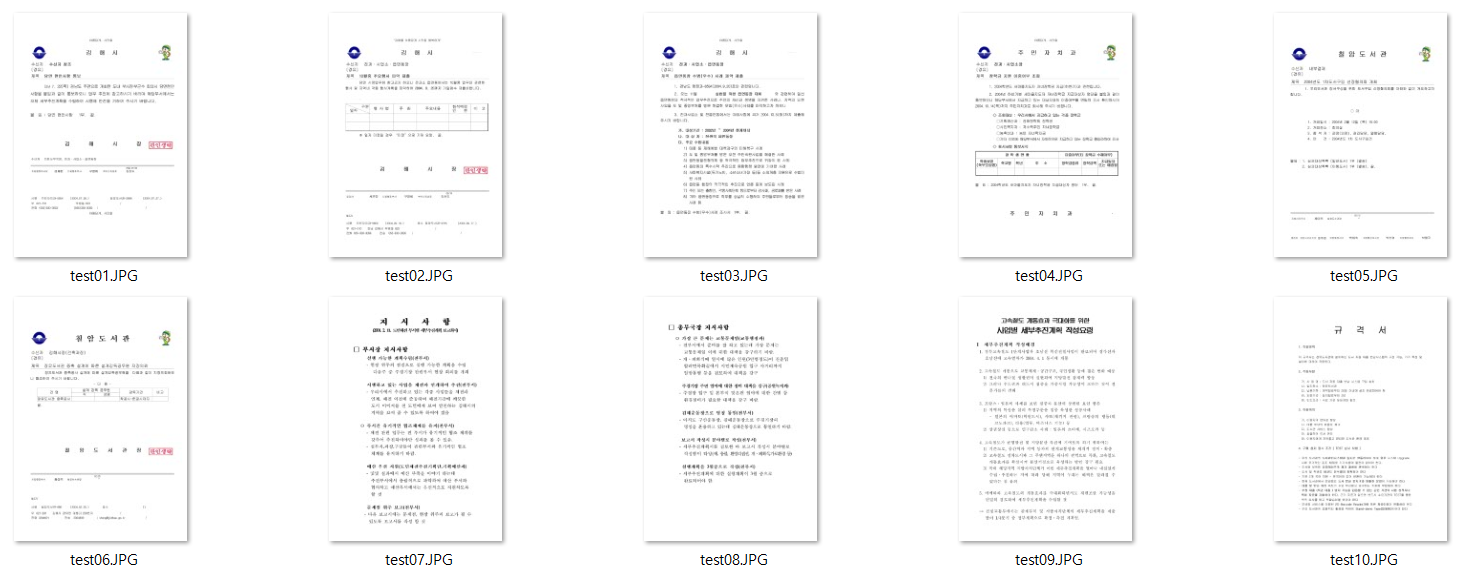

## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
- 위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 
- 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 
- 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

## 2-1. keras-ocr 써보기

- keras-ocr: 텐서플로우의 케라스 API 기반, 이미지 속 문자를 읽는 End-to-End OCR 가능 
  - 검출 모델: CRAFT(Character Region Awareness for Text Detection) 사용
  - 인식 모델: CRNN 사용

- 필요한 라이브러리 불러오기: keras_ocr, matplotlib.pyplot 
- keras_ocr.pipeline.Pipeline(): 인식을 위한 파이프라인 생성 
  - 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러옴 
  - 검출기와 인식기를 위한 각각의 가중치를 불러옴

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import os

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


- 파이프라인의 recognize()에 테스트 이미지 넣기
  - 자동차운전면허증
  - 외국인등록증
  - 손글씨
  - 공문서 01번

In [2]:
# 테스트에 사용할 이미지 

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_1 = work_dir + '/id_card_kor.png'
img_file_2 = work_dir + '/id_card_eng.png'
img_file_3 = work_dir + '/ko_handwriting.png'
img_file_4 = work_dir + '/test01.png'

image_urls = [img_file_1, img_file_2, img_file_3, img_file_4]
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

- 인식된 결과를 pyplot으로 시각화
  - 내부적으로 recognize() 는 검출기와 인식기를 두고
  - 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤
  - 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 함
  - [keras-ocr 파이프라인](https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py)

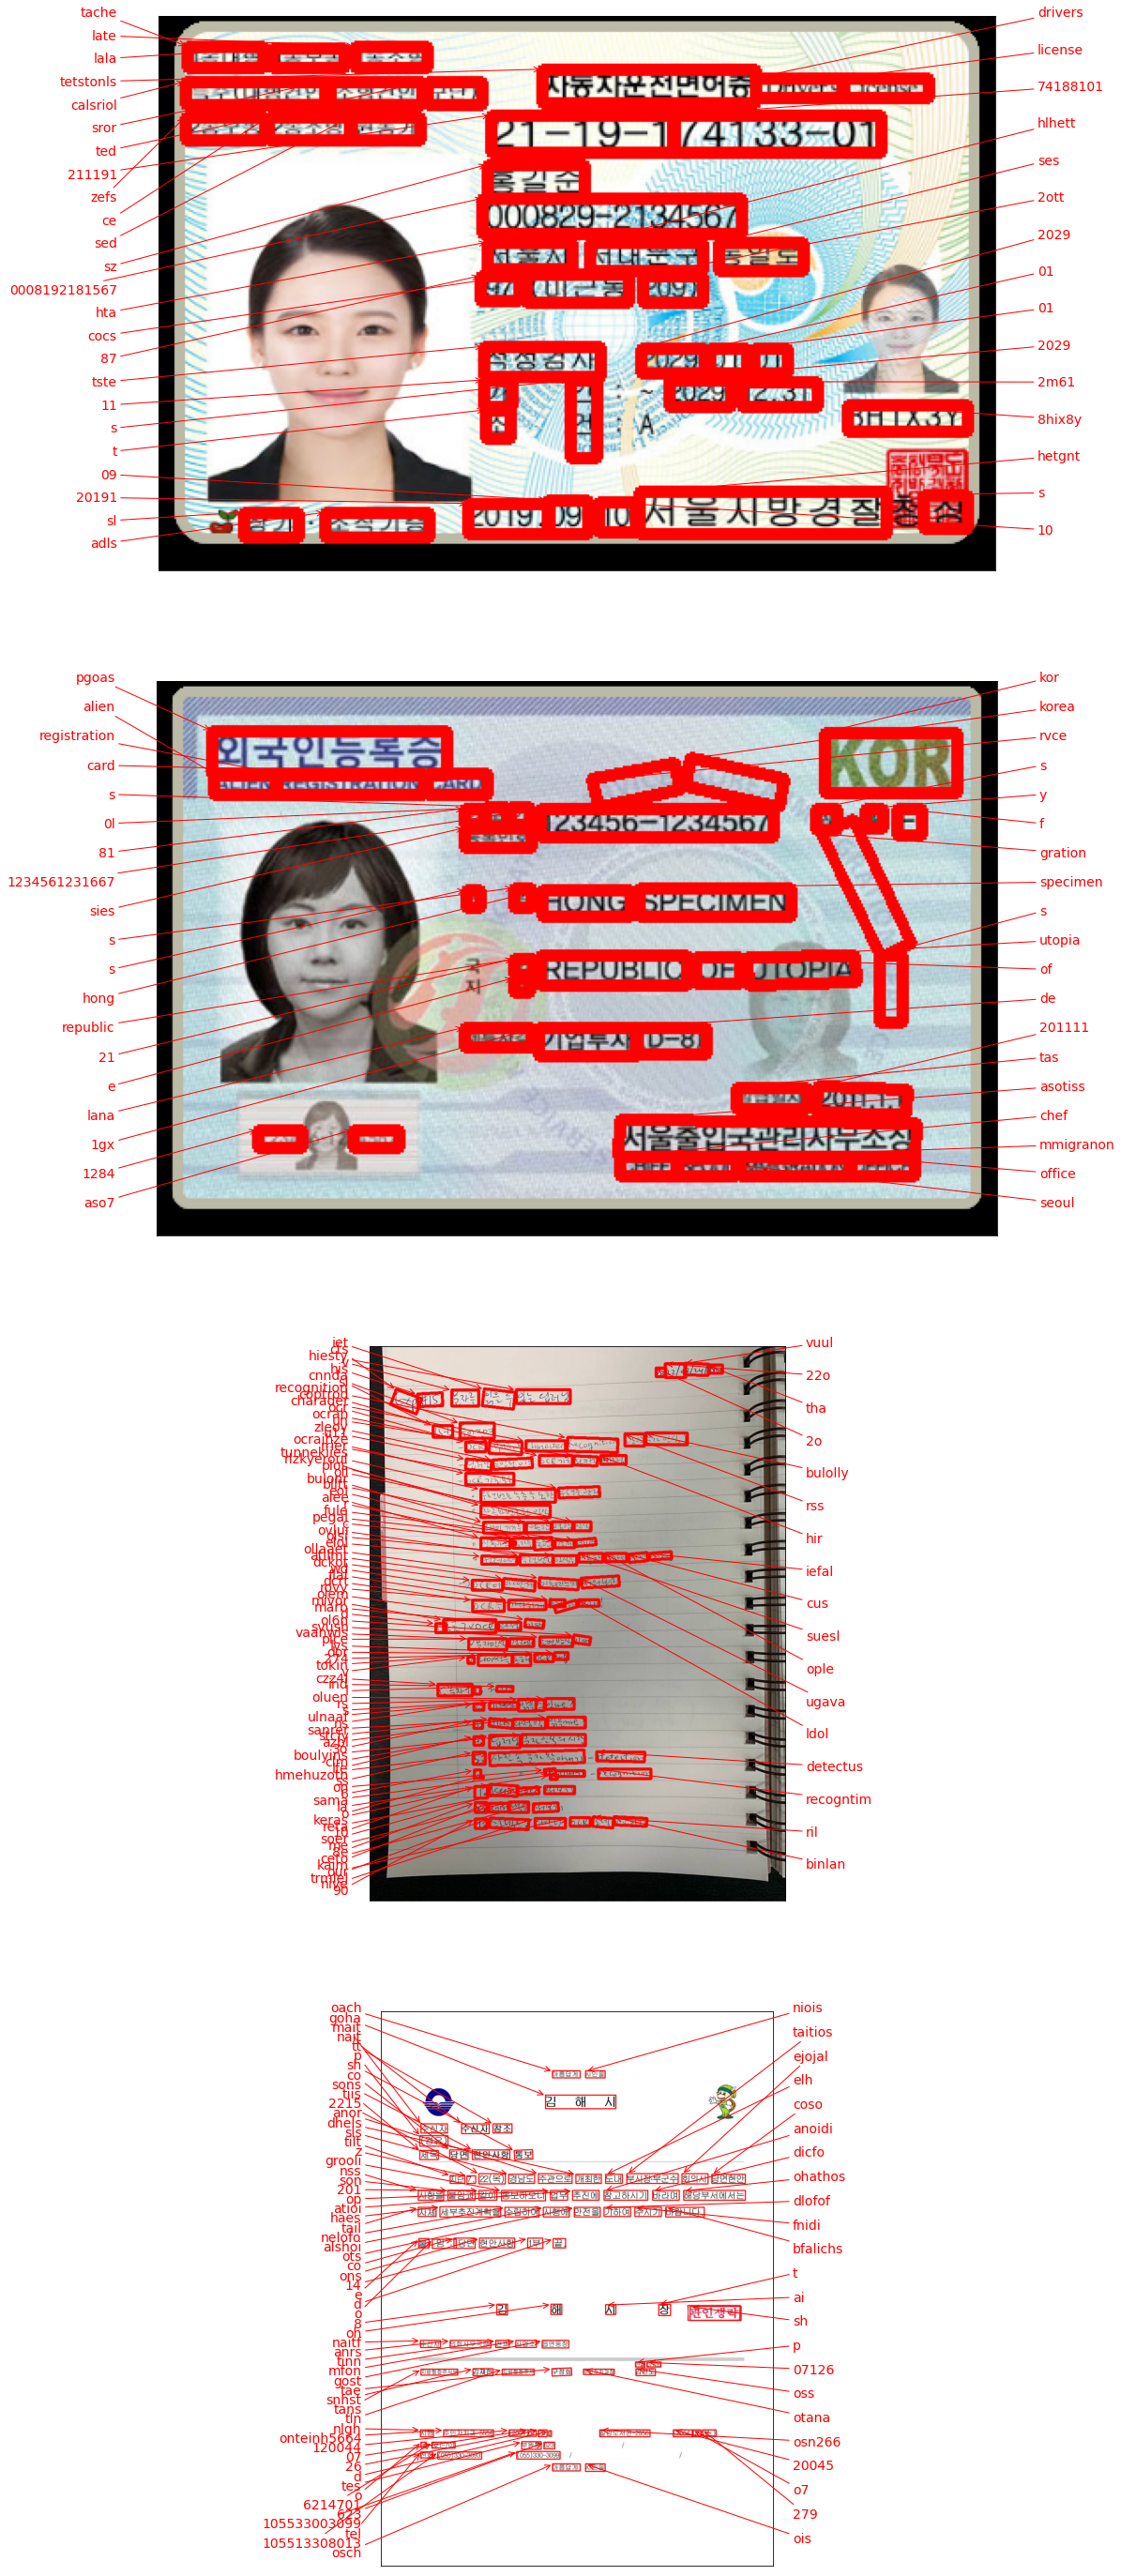

In [4]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

(주의사항)
keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델입니다. 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의해 주세요

# 15-8. 테서랙트 써보기

- 테서랙트(Tesseract): 구글에서 후원하는 OCR 오픈소스 라이브러리
  - 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있음
  - 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116개 국어 지원

### 1) 테서랙트 설치하기
- \$ sudo apt install tesseract-ocr  
- \$ sudo apt install libtesseract-dev

### 2) 테서랙트 파이썬 wrapper 설치하기
- Pytesseract: OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)
  - 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줌
  - [Pytesseract](https://pypi.org/project/pytesseract/)
  - [위키백과: 래퍼 라이브러리](https://ko.wikipedia.org/wiki/%EB%9E%98%ED%8D%BC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)

### 3) 테서랙트로 문자 검출하고 이미지 자르기 (detection)
- 테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식 가능
- OCR이 이뤄지는 전체 과정을 직접 거쳐보기 위해 검출 먼저 실행

In [5]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/id_card_kor.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#img_file_1 = work_dir + '/id_card_kor.png'
#img_file_2 = work_dir + '/id_card_eng.png'
#img_file_3 = work_dir + '/ko_handwriting.png'
#img_file_4 = work_dir + '/test01.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png


- crop_word_regions() 함수: 테스트 이미지를 받아서, 문자 검출 진행, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴
  - 기본적으로 pytesseract.image_to_data()를 사용
  - 파이썬에서 편하게 사용하기 위해서 
    - pytesseract의 Output을 사용해서 결과값의 형식을 딕셔너리(DICT) 형식으로 설정
    - 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 됨
    - 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL(pillow) 또는 opencv 라이브러리를 사용해 잘라(crop)서 cropped_image_path_list에 담아 리턴

- (주의) 위 코드에서 lang='kor'로 바꾸면 에러 발생. 테서랙트의 언어팩을 설치해야 정상 동작하게 됩니다.

  - \$ sudo apt install tesseract-ocr-kor
  - 언어팩 설치 관련해서는 [이 페이지](https://blog.daum.net/rayolla/1141) 참고

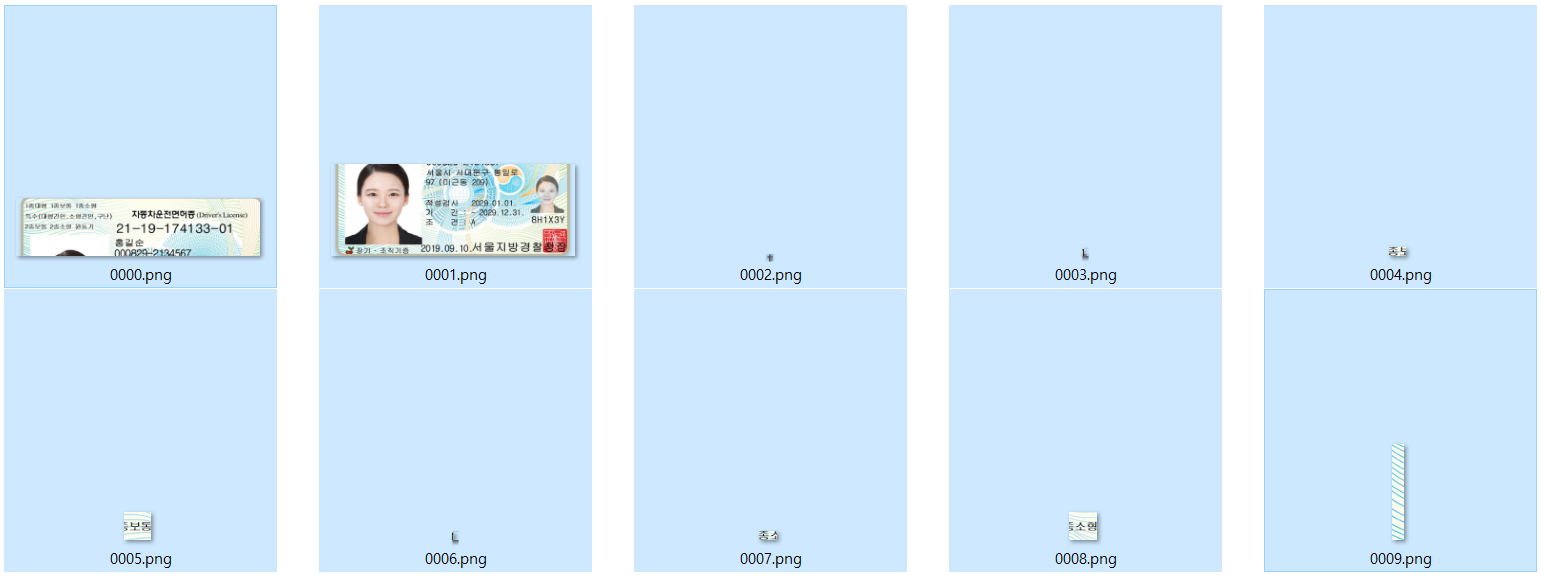

### 4) 테서랙트로 잘린 이미지에서 단어 인식하기
- image_to_string(): 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나옴


In [6]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

SEE So

& miBea

im

j

404

aS

|

a

he


Done


In [7]:
#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/id_card_eng.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#img_file_3 = work_dir + '/ko_handwriting.png'
#img_file_4 = work_dir + '/test01.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

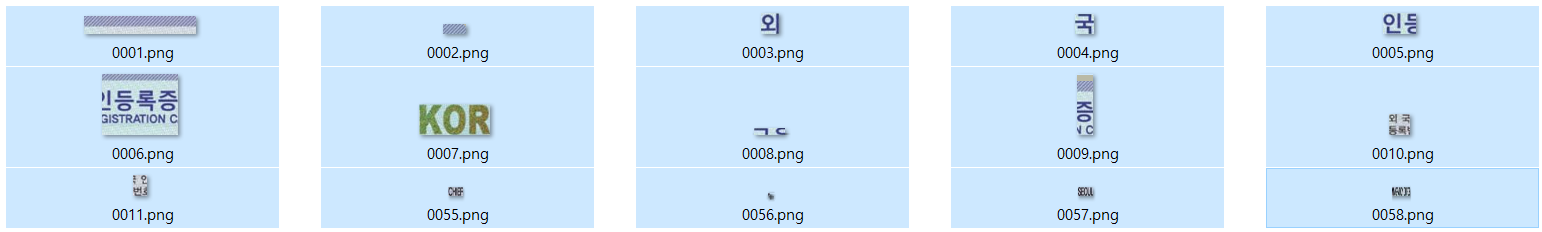

In [8]:
#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/ko_handwriting.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

#img_file_4 = work_dir + '/test01.png'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

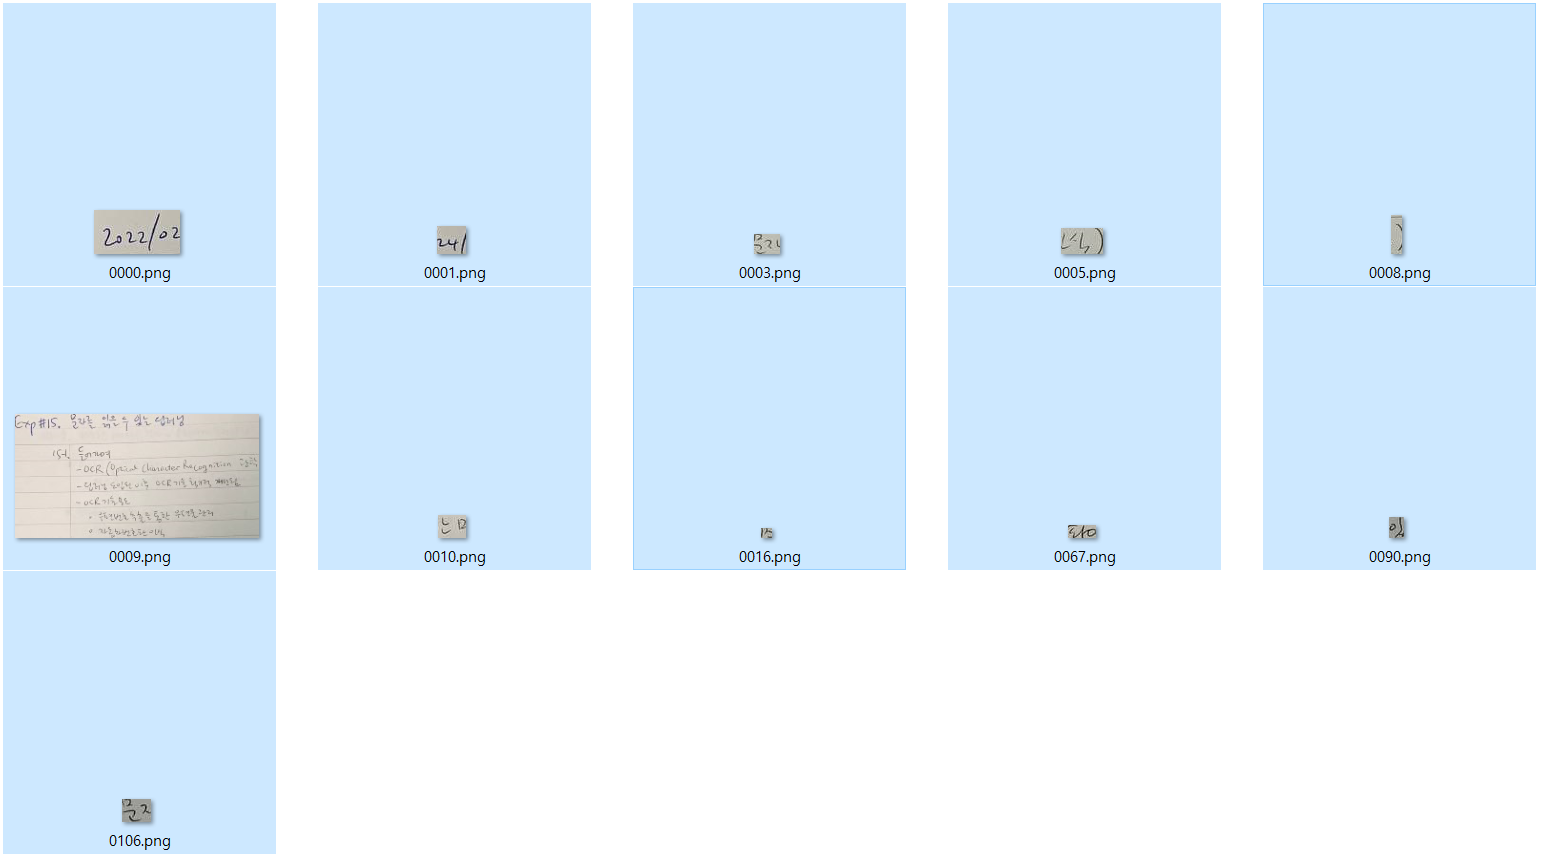

In [9]:
#work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test01.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

SystemError: tile cannot extend outside image

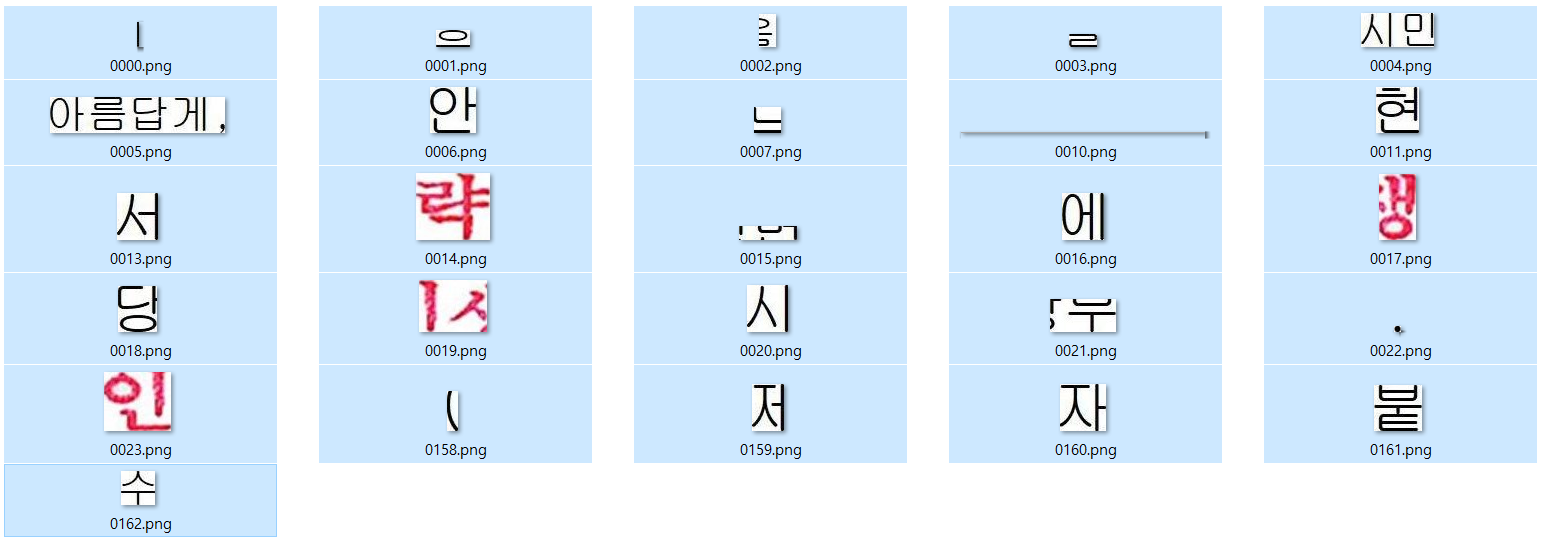

## Step3. 테스트 결과 정리
- 모듈들마다 출력 형태가 다릅니다. 
- 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 
- 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

## Step4. 결과 분석과 결론 제시
- 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
- 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 
- 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

# 프로젝트 평가

| 평가문항 | 상세기준 |
|:---|:---|
| 1. OCR을 활용하여 구현하려는 서비스의 <br> 기획이 타당한가? | 목표로 하는 서비스가 OCR를 적용 가능하며, <br> OCR을 활용했을 때 더욱 유용해진다. |
| 2. 모델 평가기준이 명확하고 체계적으로 <br> 세워졌는가? | 평가 기준에 부합하는 테스트 데이터의 특징이 <br> 무엇인지 명확하게 제시되었다. |
| 3. 평가기준에 따라 충분한 분량의 테스트가 <br> 진행되고 그 결과가 잘 정리되었는가? | 최대 20장까지의 테스트 이미지를 사용해 제시된 <br> 평가 기준에 따른 테스트 결과가 잘 정리되어 <br> 결론이 도출되었다. |

<span style = "color:red; font-weight:bold; font-size:25px">여기 까지 완료!</span>

<span style = "color:red; font-weight:bold; font-size:25px">여기 위로!</span>